<a href="https://colab.research.google.com/github/KietHuynh02/Final_Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/Final_Project/Train/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('boCanhCungKhongLo '):
    output = 1.0
  if file.startswith('boCanhCungTiger '):
    output = 2.0
  if file.startswith('boCap '):
    output = 3.0
  if file.startswith('boHung '):
    output = 4.0
  if file.startswith('boNguaPhongLan '):
    output = 5.0
  if file.startswith('boNgua '):
    output = 6.0
  if file.startswith('boRua '):
    output = 7.0
  if file.startswith('buomDem '):
    output = 8.0
  if file.startswith('buom '):
    output = 9.0
  if file.startswith('caoCao '):
    output = 10.0
  if file.startswith('chauChau '):
    output = 11.0
  if file.startswith('chuonChuon '):
    output = 12.0
  if file.startswith('de '):
    output = 13.0
  if file.startswith('deTrui '):
    output = 14.0
  if file.startswith('domDom '):
    output = 15.0
  if file.startswith('gian '):
    output = 16.0
  if file.startswith('kienBaKhoang '):
    output = 17.0
  if file.startswith('kienDen '):
    output = 18.0
  if file.startswith('kienVang '):
    output = 19.0
  if file.startswith('motCaoCo '):
    output = 20.0
  if file.startswith('muoi '):
    output = 21.0
  if file.startswith('ong '):
    output = 22.0
  if file.startswith('ongBapCay '):
    output = 23.0
  if file.startswith('ret '):
    output = 24.0
  if file.startswith('ruoi '):
    output = 25.0
  if file.startswith('sau '):
    output = 26.0
  if file.startswith('veSau '):
    output = 27.0
  if file.startswith('nhen '):
    output = 28.0
 

  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Train
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape,labels_train.shape)

(5117, 128, 128, 3) (5117,)


In [ ]:
folder = '/content/drive/MyDrive/Final_Project/Test/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('boCanhCungKhongLo '):
    output = 1.0
  if file.startswith('boCanhCungTiger '):
    output = 2.0
  if file.startswith('boCap '):
    output = 3.0
  if file.startswith('boHung '):
    output = 4.0
  if file.startswith('boNguaPhongLan '):
    output = 5.0
  if file.startswith('boNgua '):
    output = 6.0
  if file.startswith('boRua '):
    output = 7.0
  if file.startswith('buomDem '):
    output = 8.0
  if file.startswith('buom '):
    output = 9.0
  if file.startswith('caoCao '):
    output = 10.0
  if file.startswith('chauChau '):
    output = 11.0
  if file.startswith('chuonChuon '):
    output = 12.0
  if file.startswith('de '):
    output = 13.0
  if file.startswith('deTrui '):
    output = 14.0
  if file.startswith('domDom '):
    output = 15.0
  if file.startswith('gian '):
    output = 16.0
  if file.startswith('kienBaKhoang '):
    output = 17.0
  if file.startswith('kienDen '):
    output = 18.0
  if file.startswith('kienVang '):
    output = 19.0
  if file.startswith('motCaoCo '):
    output = 20.0
  if file.startswith('muoi '):
    output = 21.0
  if file.startswith('ong '):
    output = 22.0
  if file.startswith('ongBapCay '):
    output = 23.0
  if file.startswith('ret '):
    output = 24.0
  if file.startswith('ruoi '):
    output = 25.0
  if file.startswith('sau '):
    output = 26.0
  if file.startswith('veSau '):
    output = 27.0
  if file.startswith('nhen '):
    output = 28.0

  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

  # Test
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape,labels_test.shape)

(1928, 128, 128, 3) (1928,)


In [ ]:
#Reshape the sets and rescale within the byte range
photos_train = photos_train.reshape(5117,128,128,3)
photos_train = photos_train.astype('float32')/255
photos_test = photos_test.reshape(1928, 128, 128, 3)
photos_test = photos_test.astype('float32')/255
# One-hot encode the target classes
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [ ]:
(photos_train.shape, labels_train.shape),(photos_test.shape, labels_test.shape)

(((5117, 128, 128, 3), (5117, 29)), ((1928, 128, 128, 3), (1928, 29)))

In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 32
epochs = 50
classes = 29

model = Sequential()
# CNN
model.add(Conv2D(32,kernel_size=(3,3), kernel_initializer='he_uniform',activation='relu',input_shape=(128,128,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))
#_________________________________________________________

model.add(Conv2D(64,(3,3), kernel_initializer='he_uniform',activation = 'relu',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#__________________________________________________________

model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(256,(3,3), kernel_initializer='he_uniform',activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(512,(3,3), kernel_initializer='he_uniform',activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
# ANN
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(256,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes ,activation = 'softmax'))

# Compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1, use_multiprocessing=True)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac cua ham', test_acc)
print('Ham mat mat', test_loss)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [ ]:
model.save('/content/drive/MyDrive/Final_Project/Final_Project/model_insect.h5')

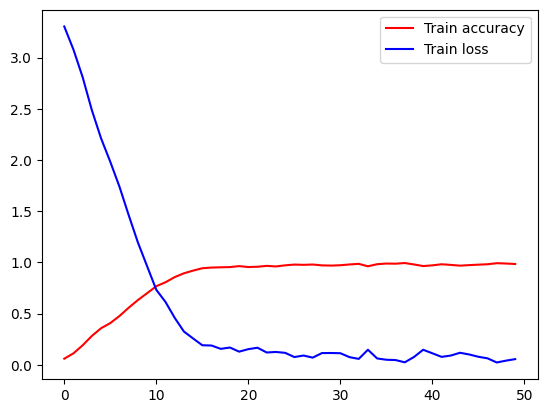

In [ ]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [ ]:
class_Insect =    {1: 'boCanhCungKhongLo',2: 'boCanhCungTiger',3: 'boCap',4: 'boHung',5: 'boNguaPhongLan',
                   6: 'boNgua',7: 'boRua',8: 'buomDem',9: 'buom',10: 'caoCao',
                   11: 'chauChau',12: 'chuonChuon',13: 'de',14: 'deTrui',15: 'domDom',
                   16: 'gian',17: 'kienBaKhoang',18: 'kienDen',19: 'kienVang',20: 'motCaoCo',
                   21: 'muoi',22: 'ong',23: 'ongBapCay',24: 'ret',
                   25: 'ruoi',26: 'sau',27: 'veSau',28: 'nhen'}

1/1 [==============================] - 0s 420ms/step
Predicted:  nhen


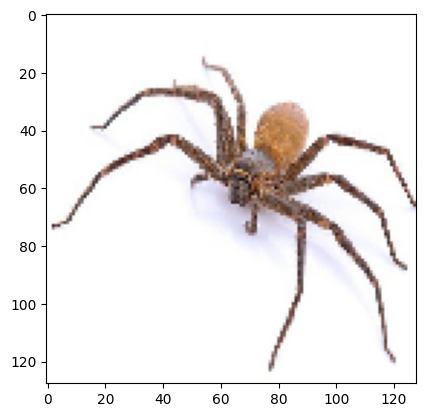

In [ ]:
#test
import matplotlib.pyplot as plt
import numpy as np 
filePath = '/content/drive/MyDrive/Final_Project/Image_test/connhen.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ",class_Insect[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 23ms/step
Predicted:  sau


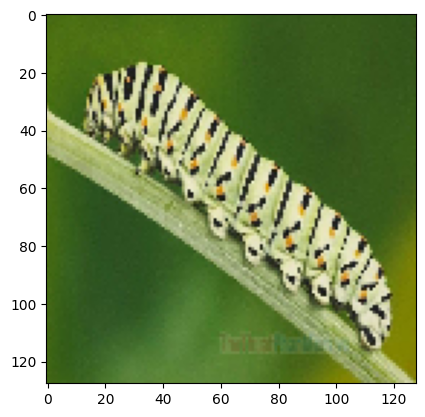

In [ ]:
filePath = '/content/drive/MyDrive/Final_Project/Image_test/sau.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ",class_Insect[pred])
plt.imshow(testImage)